# CME538 - Introduction to Data Science
## Lecture 8.3 - Cross-Validation and Class Imbalance

Welcome to **Lecture 8.3**! In this notebook, we’ll explore two crucial topics in machine learning: **Cross-Validation** and **Class Imbalance**. These concepts are key to improving model generalization and handling datasets with skewed distributions.

### Topics Covered:

1. [Cross-Validation](#section1)
2. [Advanced Cross-Validation](#section2)
3. [Class Imbalance](#section3)

### Why This Notebook is Important 🧠

- **Cross-Validation**: It helps us choose models and hyperparameters without overfitting. By simulating test error multiple times using different data splits, we can assess model performance more accurately.
  
- **Advanced Cross-Validation**: This section covers how to handle special data types like time-series and geospatial data, where random splitting may not work well.

- **Class Imbalance**: Many real-world datasets, like medical or fraud detection data, have imbalanced classes. We’ll explore techniques to handle this, such as adjusting class weights or resampling.

Let’s dive in! 🚀

<a id='section1'></a>
## 1. Cross-Validation 🎯

Cross-validation is a technique used to evaluate machine learning models by splitting the data into multiple subsets or folds. The model is trained on some folds and tested on the others, which helps reduce overfitting.

We'll start by using **k-fold cross-validation** to evaluate a logistic regression model on the NBA dataset.

In [2]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load NBA dataset
nba = pd.read_csv('nba.csv')

# Feature selection (using FG_PCT and REB to predict WIN/LOSS)
X = nba[['FG_PCT', 'REB']]
y = nba['WL'].apply(lambda x: 1 if x == 'W' else 0)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic regression model
model = LogisticRegression()

# Perform cross-validation
accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Report results
print(f'Cross-Validation Accuracies: {accuracies}')
print(f'Mean Accuracy: {sum(accuracies) / len(accuracies)}')

Cross-Validation Accuracies: [0.7154471544715447, 0.766260162601626, 0.733739837398374, 0.7560975609756098, 0.7520325203252033]
Mean Accuracy: 0.7447154471544716


### What Just Happened? 🤔

In this section, we explored the concept of **k-fold cross-validation**, a powerful technique to assess model performance more reliably than using a single train-test split. 

Here’s what we learned:

- **k-fold Cross-Validation**: 
   - We split the data into **k folds** and trained the model on **k-1 folds**, leaving one fold for testing. This process was repeated **k times**, ensuring that each fold was used as a test set once.
   - By averaging the performance across all folds, we obtained a more reliable estimate of how our model will perform on unseen data.

- **Why is this important?** 
   - **k-fold cross-validation** helps mitigate the problem of overfitting. Instead of evaluating model performance on a single split, which might be biased, cross-validation gives us a broader understanding by testing on multiple splits.
   - This method ensures that the model gets tested on various subsets of the data, providing a better estimate of how it will generalize to new, unseen data.

We can now compare different models or tune hyperparameters with confidence, knowing that cross-validation provides a more robust evaluation.

In the next section, we’ll dive into more advanced forms of cross-validation, such as time-based cross-validation, and tackle some real-world challenges like **class imbalance**.

<a id='section2'></a>
## 2. Advanced Cross-Validation

Not all data is suitable for random splitting. In time-series data, for example, earlier points can influence later points, so we need to split based on time to simulate real-world predictions. In geospatial data, nearby points may have similar features, violating the assumption that training and test data are independent.

In [5]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Sort NBA data by game date to simulate time-series data
nba_sorted = nba.sort_values('GAME_DATE')
X_time = nba_sorted[['FG_PCT', 'REB']]
y_time = nba_sorted['WL'].apply(lambda x: 1 if x == 'W' else 0)

# TimeSeriesSplit for time-based cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Logistic regression model
model = LogisticRegression()

# Initialize lists to store metrics for each split
accuracies = []
precisions = []
recalls = []

# Perform time-series cross-validation
for train_index, test_index in tscv.split(X_time):
    X_train, X_test = X_time.iloc[train_index], X_time.iloc[test_index]
    y_train, y_test = y_time.iloc[train_index], y_time.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Append results for each fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    # Print the performance for the current split
    print(f"Fold: Accuracy = {accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}")

# Summarize results across all folds
print("\n--- Cross-Validation Summary ---")
print(f"Average Accuracy: {sum(accuracies) / len(accuracies):.2f}")
print(f"Average Precision: {sum(precisions) / len(precisions):.2f}")
print(f"Average Recall: {sum(recalls) / len(recalls):.2f}")

Fold: Accuracy = 0.67, Precision = 0.67, Recall = 0.65
Fold: Accuracy = 0.71, Precision = 0.70, Recall = 0.71
Fold: Accuracy = 0.74, Precision = 0.74, Recall = 0.74
Fold: Accuracy = 0.71, Precision = 0.69, Recall = 0.77
Fold: Accuracy = 0.73, Precision = 0.72, Recall = 0.77

--- Cross-Validation Summary ---
Average Accuracy: 0.71
Average Precision: 0.70
Average Recall: 0.73


### What Just Happened? 🤔

In this section, we explored **time-based cross-validation** using the NBA dataset. Unlike standard k-fold cross-validation, time-series cross-validation respects the chronological order of the data, which is crucial in real-world scenarios like stock prices or weather forecasting, where earlier events affect later ones.

Here’s what we learned:

- **TimeSeriesSplit**: Instead of random splits, this method gradually increases the training set size while keeping later data for testing. This simulates real-time predictions more effectively.
  
- **Model Performance**: 
  - The **accuracy** shows how well the model predicted wins and losses for each fold.
  - **Precision** gave us insights into how many of the predicted wins were actually wins, while **recall** told us how many actual wins were correctly predicted.
  
- **Cross-Validation Summary**: By averaging these metrics across all the folds, we can better understand how the model performs over time, giving us a more realistic view of how well it generalizes to future data.

This approach is especially important for models dealing with time-sensitive data, where standard random splitting can lead to over-optimistic results.

Next, we’ll tackle **class imbalance** and explore how it affects model performance and evaluation.

<a id='section3'></a>
## 3. Class Imbalance ⚖️

Class imbalance occurs when the number of instances in one class far outweighs the other. This can lead to misleading metrics, such as high accuracy for a model that always predicts the majority class. We’ll explore how to handle this issue using re-sampling techniques and weighted loss functions.


--- Imbalanced Case (Test Set) ---
Accuracy: 0.75
Precision: 0.71
Recall: 0.78

Classification Report (Imbalanced):
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       390
           1       0.71      0.78      0.74       348

    accuracy                           0.75       738
   macro avg       0.75      0.75      0.75       738
weighted avg       0.75      0.75      0.75       738


--- Balanced Case (Test Set) ---
Accuracy: 0.75
Precision: 0.77
Recall: 0.72

Classification Report (Balanced):
               precision    recall  f1-score   support

           0       0.72      0.77      0.75       357
           1       0.77      0.72      0.75       381

    accuracy                           0.75       738
   macro avg       0.75      0.75      0.75       738
weighted avg       0.75      0.75      0.75       738



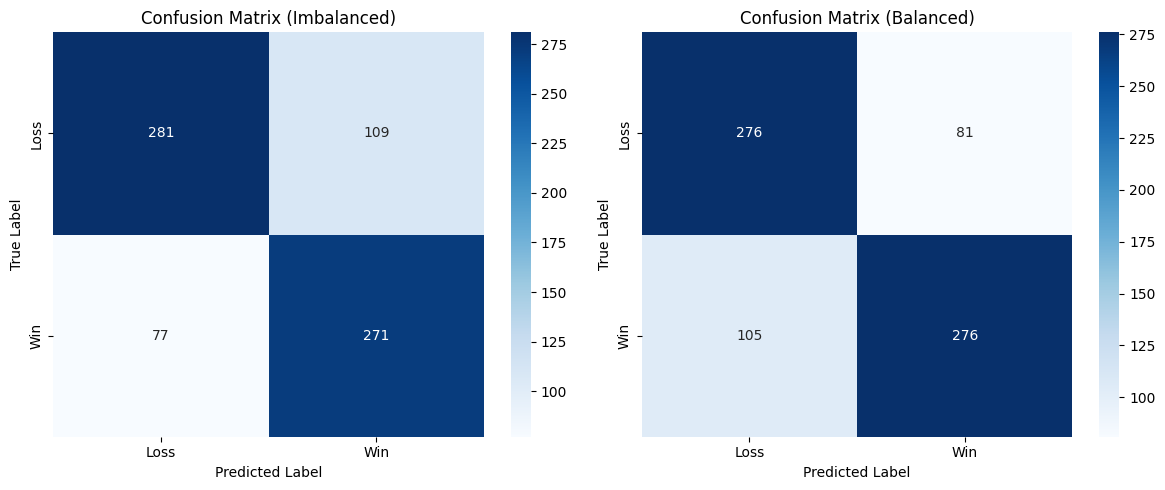

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Imbalanced dataset (original dataset without resampling)
X_imbalanced = nba[['FG_PCT', 'REB']]
y_imbalanced = nba['WL'].apply(lambda x: 1 if x == 'W' else 0)

# Split the imbalanced data into training and test sets
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced, y_imbalanced, test_size=0.3, random_state=42)

# Fit logistic regression without class weights (imbalanced case)
model_imbalanced = LogisticRegression(random_state=42)
model_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)

# Predict on the test set (imbalanced)
y_pred_imbalanced = model_imbalanced.predict(X_test_imbalanced)

# Evaluate model performance (imbalanced)
accuracy_imbalanced = accuracy_score(y_test_imbalanced, y_pred_imbalanced)
precision_imbalanced = precision_score(y_test_imbalanced, y_pred_imbalanced)
recall_imbalanced = recall_score(y_test_imbalanced, y_pred_imbalanced)
conf_matrix_imbalanced = confusion_matrix(y_test_imbalanced, y_pred_imbalanced)

# Simulate class imbalance by down-sampling the majority class (W)
majority = nba[nba['WL'] == 'W']
minority = nba[nba['WL'] == 'L']

# Down-sample majority class to match the size of the minority class (balanced case)
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)
nba_balanced = pd.concat([majority_downsampled, minority])

# Balanced dataset
X_balanced = nba_balanced[['FG_PCT', 'REB']]
y_balanced = nba_balanced['WL'].apply(lambda x: 1 if x == 'W' else 0)

# Split the balanced data into training and test sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Fit logistic regression with class weights to handle imbalance (balanced case)
model_balanced = LogisticRegression(class_weight='balanced', random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predict on the test set (balanced)
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate model performance (balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
precision_balanced = precision_score(y_test_balanced, y_pred_balanced)
recall_balanced = recall_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

# Print and compare results
print("\n--- Imbalanced Case (Test Set) ---")
print(f'Accuracy: {accuracy_imbalanced:.2f}')
print(f'Precision: {precision_imbalanced:.2f}')
print(f'Recall: {recall_imbalanced:.2f}')
print("\nClassification Report (Imbalanced):\n", classification_report(y_test_imbalanced, y_pred_imbalanced))

print("\n--- Balanced Case (Test Set) ---")
print(f'Accuracy: {accuracy_balanced:.2f}')
print(f'Precision: {precision_balanced:.2f}')
print(f'Recall: {recall_balanced:.2f}')
print("\nClassification Report (Balanced):\n", classification_report(y_test_balanced, y_pred_balanced))

# Plot confusion matrices
plt.figure(figsize=(12, 5))

# Imbalanced confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_imbalanced, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title('Confusion Matrix (Imbalanced)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Balanced confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title('Confusion Matrix (Balanced)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

### What Just Happened? 🤔

In this section, we tackled the common problem of **class imbalance**, where one class (e.g., wins) far outweighs the other (e.g., losses). Class imbalance is prevalent in many real-world scenarios, such as fraud detection or medical diagnoses, and can lead to biased models. We examined both **imbalanced** and **balanced** versions of the dataset to see how different approaches affect model performance.

Here’s what we learned:

- **Imbalanced Case**:  
   In the original dataset, where the majority class (wins) dominates, our logistic regression model struggled to correctly predict the minority class (losses). Although the model may have achieved decent **accuracy**, it heavily favored the majority class, leading to poor performance on the minority class.  
   The confusion matrix for the imbalanced case showed that the model misclassified many losses as wins.

- **Simulating Class Imbalance**:  
   To address this, we created a balanced version of the dataset by down-sampling the majority class (wins). This gave the model a fair chance to learn about both wins and losses, rather than being biased toward the majority class.

- **Class Weighting**:  
   In addition to resampling, we also applied **class weighting** to the logistic regression model. This technique assigns higher importance to the minority class during training, allowing the model to better handle imbalanced datasets without needing to down-sample.  
   Class weighting is especially helpful in cases where down-sampling would lead to loss of valuable data, such as fraud detection or medical diagnoses.

- **Performance Comparison**:  
   While **accuracy** might have looked acceptable for the imbalanced case, it didn't tell the full story. The model predicted wins most of the time due to class imbalance, leading to misleading results.  
   By focusing on metrics like **precision** and **recall**, we gained a clearer understanding of how well the model performs on both classes. The confusion matrix and classification report gave us detailed insights into how well the model handled each class.  
   In the **balanced case**, both the precision and recall for the minority class (losses) improved significantly, demonstrating the importance of addressing class imbalance for fairer, more accurate predictions.

### Key Takeaways:

- **Accuracy alone isn't enough** when dealing with imbalanced datasets, as it can be misleading.
- **Precision, recall, and F1-score** offer deeper insights, especially for the minority class, which is often the class of interest.
- **Class weighting** and **resampling techniques** are effective strategies to handle class imbalance and improve model performance.

In conclusion, dealing with class imbalance requires special attention. By adjusting class weights or using techniques like re-sampling, we can build more balanced and fair models, which is crucial in real-world applications where the minority class is often the most important to predict.